In [ ]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

import h5py

import matplotlib
matplotlib.style.use('publication23')

In [91]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [92]:
mQ = 0.6

In [93]:
df = h5py.File('/home/const/Numerics/TMQGP/ipy/TMQGP/test/FitChi2/4ch_HI/0.00/data_single_170.hdf5')

Gtab = array(df['Q']['G'])

In [94]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab)

In [95]:
T = 0.2

## Compare subtracted calculation of the real part

(0.0, 1.0)

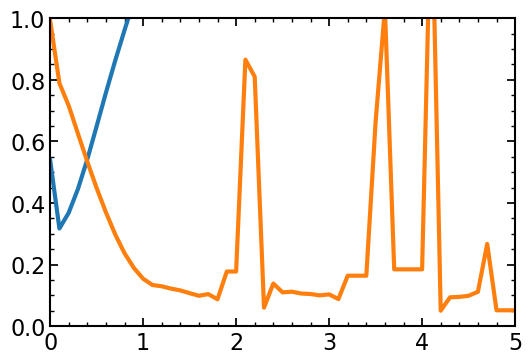

In [96]:
plt.plot(pt1.qrange, pt1.peaks)
plt.plot(pt1.qrange, pt1.widths)
plt.ylim(0, 1)

In [79]:
T = 0.2

In [80]:
# %%timeit
rr1 = array([tm.ReG2_subtr(e, 0, T, pt1.R, pt1.R, 5) for e in erange])

In [81]:
# %%timeit
rr2 = array([tm.ReG2_pole(e, 0, T, pt1.R, pt1.R, 5) for e in erange])

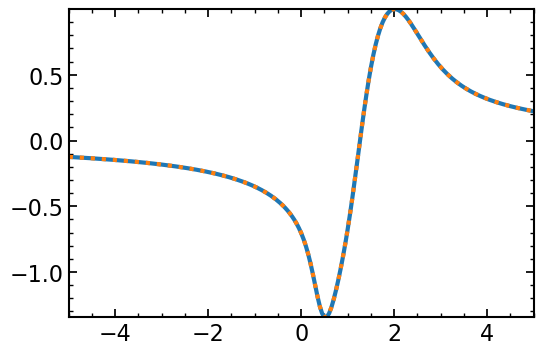

In [82]:
plt.plot(erange, rr1, label='GSL')
plt.plot(erange, -rr2, ls=':', label='subtracted')

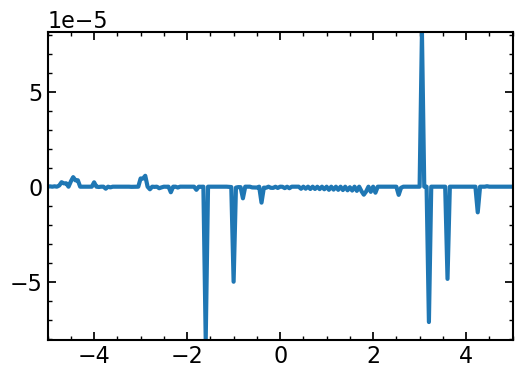

In [25]:
plt.plot(erange, rr1 +  rr2)

##  Load the data

## Compare channels built with different methods

In [75]:
ch_KK_im0 = QuarkTM.Channel(pt1, pt1, T, G2_mode=0, expand=0, ImMode=0)
ch_KK_im1 = QuarkTM.Channel(pt1, pt1, T, G2_mode=0, expand=0, ImMode=1)

TypeError: Channel.__init__() got an unexpected keyword argument 'Gtab'

[]

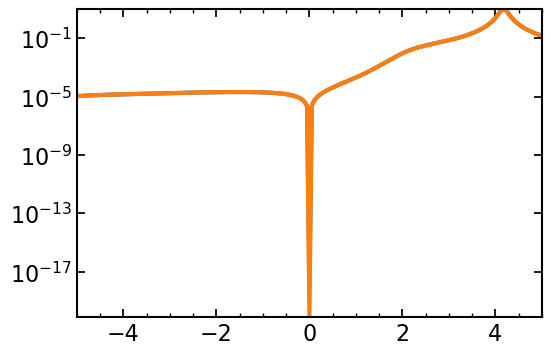

In [70]:
plt.plot(ch_KK_im0.erange, abs(imag(ch_KK_im0.G2[:, 20])))
plt.plot(ch_KK_im0.erange, abs(imag(ch_KK_im1.G2[:, 20])))

plt.semilogy()

In [26]:
ch_KK = QuarkTM.Channel(pt1, pt1, T, G2_mode=0, expand=0)

In [28]:
ch_KK_exp = QuarkTM.Channel(pt1, pt1, T, G2_mode=0, expand=1)

In [29]:
ch_full = QuarkTM.Channel(pt1, pt1, T, G2_mode=1, expand=0)

100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [03:31<00:00,  4.15s/it]


In [30]:
ch_full_exp = QuarkTM.Channel(pt1, pt1, T, G2_mode=1, expand=1)

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [06:52<00:00,  4.08s/it]


In [31]:
ch_KK.populate_T_fast()
ch_KK_exp.populate_T_fast()
ch_full.populate_T_fast()
ch_full_exp.populate_T_fast()

(-500.0, 0.0)

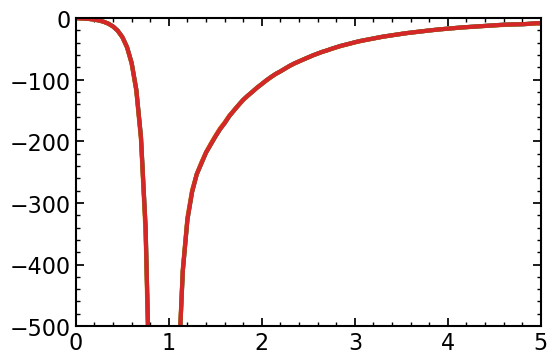

In [32]:
plt.plot(ch_KK.erange, imag(ch_KK.TM[:, 0]))
plt.plot(ch_KK_exp.erange, imag(ch_KK_exp.TM[:, 0]))
plt.plot(ch_KK.erange, imag(ch_KK.TM[:, 0]))
plt.plot(ch_KK.erange, imag(ch_KK.TM[:, 0]))

plt.xlim(0, 5)

plt.ylim(-500, 0)

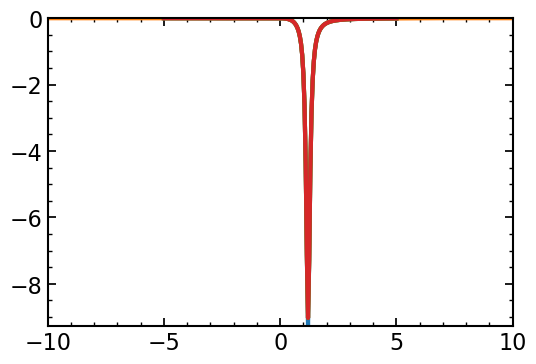

In [33]:
plt.plot(ch_KK.erange, imag(ch_KK.G2[:, 0]))
plt.plot(ch_KK_exp.erange, imag(ch_KK_exp.G2[:, 0]))
plt.plot(ch_KK.erange, imag(ch_full.G2[:, 0]))
plt.plot(ch_KK.erange, imag(ch_full.G2[:, 0]))

In [37]:
e = 2.5
i_kk = np.argmin(abs(ch_KK.erange - e))
i_kk_exp = np.argmin(abs(ch_KK_exp.erange - e))
i_full = np.argmin(abs(ch_full.erange - e))
i_full_exp = np.argmin(abs(ch_full_exp.erange - e))

(0.0, 1.5)

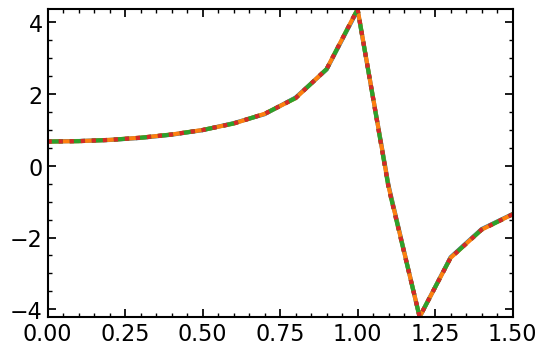

In [40]:
plt.plot(ch_KK.qrange, real(ch_KK.G2[i_kk, :]))
plt.plot(ch_KK_exp.qrange, real(ch_KK_exp.G2[i_kk_exp, :]))
plt.plot(ch_full.qrange, real(ch_full.G2[i_full, :]), ls='--')
plt.plot(ch_full_exp.qrange, real(ch_full_exp.G2[i_full_exp, :]), ls=':')
plt.xlim(0, 6)

plt.xlim(0, 1.5)

In [48]:
-imag(ch_full_exp.G2[i_full_exp, :])

array([ 5.56186745e-02,  5.71725091e-02,  6.20576923e-02,  7.10430952e-02,
        8.57924763e-02,  1.09712447e-01,  1.50090902e-01,  2.24265937e-01,
        3.81364689e-01,  8.05926384e-01,  2.61319790e+00,  9.92421593e+00,
        2.28352839e+00,  6.98940308e-01,  3.21146015e-01,  1.80971281e-01,
        1.14705015e-01,  7.83007057e-02,  5.61069444e-02,  4.14634414e-02,
        3.11596776e-02,  2.35119096e-02,  1.75991366e-02,  1.29230648e-02,
        9.22858486e-03,  6.38166859e-03,  4.27912305e-03,  2.80088860e-03,
        1.80794294e-03,  1.16415248e-03,  7.56045918e-04,  4.99901761e-04,
        3.38955314e-04,  2.36777357e-04,  1.70751475e-04,  1.27080321e-04,
        9.73995768e-05,  7.66288601e-05,  6.16578630e-05,  5.05564607e-05,
        4.21070760e-05,  3.55255091e-05,  3.02952285e-05,  2.60524548e-05,
        2.25939098e-05,  1.97123664e-05,  1.73095049e-05,  1.52670082e-05,
        1.35210449e-05,  1.20328007e-05,  1.07425777e-05, -1.00000000e-03,
       -1.00000000e-03, -

In [49]:
-imag(ch_KK.G2[i_kk, :])

array([5.58284209e-02, 5.72646324e-02, 6.19363966e-02, 7.07996869e-02,
       8.54931876e-02, 1.09444879e-01, 1.50657813e-01, 2.23440181e-01,
       3.82793328e-01, 8.04575463e-01, 2.60361589e+00, 1.01870200e+01,
       2.28371136e+00, 6.96678604e-01, 3.20029939e-01, 1.80804701e-01,
       1.14941099e-01, 7.85874032e-02, 5.63008568e-02, 4.15441650e-02,
       3.11574367e-02, 2.34666945e-02, 1.75430905e-02, 1.28754565e-02,
       9.19670462e-03, 6.36453659e-03, 4.27209298e-03, 2.79924751e-03,
       1.80849806e-03, 1.16525454e-03, 7.57039709e-04, 5.00621013e-04,
       3.39421589e-04, 2.37059771e-04, 1.70914606e-04, 1.27171192e-04,
       9.74486912e-05, 7.66548295e-05, 6.16710996e-05, 5.05630520e-05,
       4.21102482e-05, 3.55269740e-05, 3.02957284e-05, 2.60672198e-05,
       2.25996688e-05, 1.97214772e-05, 1.73079032e-05, 1.52662226e-05,
       1.35260918e-05, 1.20330717e-05, 1.07433495e-05])

In [50]:
-imag(ch_full.G2[i_full, :])

array([5.56186745e-02, 5.71725091e-02, 6.20576923e-02, 7.10430952e-02,
       8.57924763e-02, 1.09712447e-01, 1.50090902e-01, 2.24265937e-01,
       3.81364689e-01, 8.05926384e-01, 2.61319790e+00, 9.92421593e+00,
       2.28352839e+00, 6.98940308e-01, 3.21146015e-01, 1.80971281e-01,
       1.14705015e-01, 7.83007057e-02, 5.61069444e-02, 4.14634414e-02,
       3.11596776e-02, 2.35119096e-02, 1.75991366e-02, 1.29230648e-02,
       9.22858486e-03, 6.38166859e-03, 4.27912305e-03, 2.80088860e-03,
       1.80794294e-03, 1.16415248e-03, 7.56045918e-04, 4.99901761e-04,
       3.38955314e-04, 2.36777357e-04, 1.70751475e-04, 1.27080321e-04,
       9.73995768e-05, 7.66288601e-05, 6.16578630e-05, 5.05564607e-05,
       4.21070760e-05, 3.55255091e-05, 3.02952285e-05, 2.60524548e-05,
       2.25939098e-05, 1.97123664e-05, 1.73095049e-05, 1.52670082e-05,
       1.35210449e-05, 1.20328007e-05, 1.07425777e-05])

(1e-06, 100)

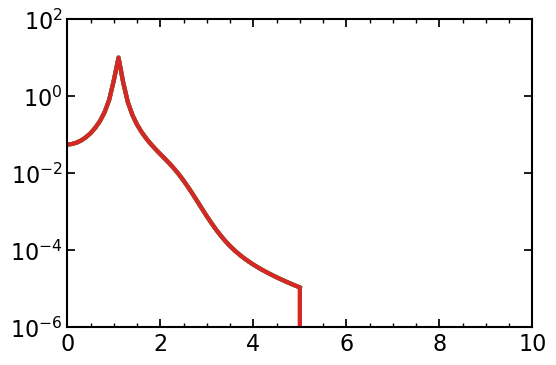

In [47]:
plt.plot(ch_KK.qrange, -imag(ch_KK.G2[i_kk, :]))
plt.plot(ch_KK_exp.qrange, -imag(ch_KK_exp.G2[i_kk_exp, :]))
plt.plot(ch_full.qrange, -imag(ch_full.G2[i_full, :]))
plt.plot(ch_full_exp.qrange, -imag(ch_full_exp.G2[i_full_exp, :]))
# plt.xlim(0, 6)

plt.semilogy()

plt.ylim(1e-6, 100)